In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [2]:
import os
os.chdir('/home/tapas/Downloads/Brainwaves/competition/')

In [3]:
# Load data
##### Load train and Test set

train = pd.read_csv("new_train.csv")[1:4000]
test = pd.read_csv("test.csv")
IDtest = test["transaction_id"]

In [4]:
drop_column = ['transaction_id']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

In [5]:
train = train.dropna(subset=['target'])

In [6]:
na_totals = train.isnull().sum().sort_values(ascending=False)
na_totals[na_totals>0]

cat_var_8    1087
cat_var_3     449
cat_var_1     123
dtype: int64

In [7]:
full_data = [train, test]

In [8]:
for dataset in full_data:
    dataset['num_var_1'] = np.log1p(dataset['num_var_1'])
    dataset['num_var_2'] = np.log1p(dataset['num_var_2'])
    dataset['num_var_3'] = np.log1p(dataset['num_var_3'])
    dataset['num_var_4'] = np.log1p(dataset['num_var_4'])
    dataset['num_var_5'] = np.log1p(dataset['num_var_5'])
    dataset['num_var_6'] = np.log1p(dataset['num_var_6'])
    dataset['num_var_7'] = np.log1p(dataset['num_var_7'])

In [9]:
###COMPLETING: complete or delete  missing values in train and test/validation dataset
for dataset in full_data:    
    #complete embarked with mode
    dataset['cat_var_3'].fillna(dataset['cat_var_3'].mode()[0], inplace = True)
    dataset['cat_var_6'].fillna(dataset['cat_var_6'].mode()[0], inplace = True)
    dataset['cat_var_1'].fillna(dataset['cat_var_1'].mode()[0], inplace = True)
    dataset['cat_var_8'].fillna(dataset['cat_var_8'].mode()[0], inplace = True)

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [12]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset
label = LabelEncoder()

for dataset in full_data: 
    dataset['cat_var_1'] = label.fit_transform(dataset['cat_var_1'])
    dataset['cat_var_2'] = label.fit_transform(dataset['cat_var_2'])
    dataset['cat_var_3'] = label.fit_transform(dataset['cat_var_3'])
    dataset['cat_var_4'] = label.fit_transform(dataset['cat_var_4'])
    dataset['cat_var_5'] = label.fit_transform(dataset['cat_var_5'])
    dataset['cat_var_6'] = label.fit_transform(dataset['cat_var_6'])
    dataset['cat_var_7'] = label.fit_transform(dataset['cat_var_7'])
    dataset['cat_var_8'] = label.fit_transform(dataset['cat_var_8'])
    dataset['cat_var_9'] = label.fit_transform(dataset['cat_var_9'])
    dataset['cat_var_10'] = label.fit_transform(dataset['cat_var_10'])
    dataset['cat_var_11'] = label.fit_transform(dataset['cat_var_11'])
    dataset['cat_var_12'] = label.fit_transform(dataset['cat_var_12'])
    dataset['cat_var_13'] = label.fit_transform(dataset['cat_var_13'])
    dataset['cat_var_14'] = label.fit_transform(dataset['cat_var_14'])
    dataset['cat_var_15'] = label.fit_transform(dataset['cat_var_15'])
    dataset['cat_var_16'] = label.fit_transform(dataset['cat_var_16'])
    dataset['cat_var_17'] = label.fit_transform(dataset['cat_var_17'])
    dataset['cat_var_18'] = label.fit_transform(dataset['cat_var_18'])

In [13]:
## Separate train features and label 

train["target"] = train["target"].astype(int)

Y_train = train["target"]

X_train = train.drop(labels = ["target"],axis = 1)

In [14]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


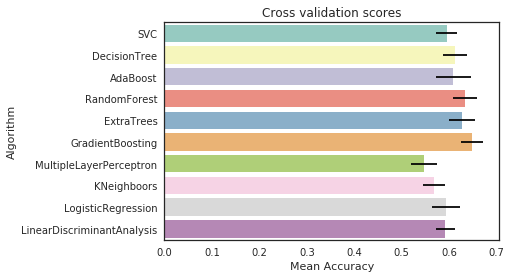

In [15]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = train["target"], scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [16]:
## META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   41.0s finished


In [17]:
gsadaDTC.best_score_

0.63306878306878311

In [18]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.5min finished


0.65291005291005288

In [19]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   31.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  6.5min finished


0.65634920634920635

In [20]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  4.8min finished


0.6526455026455027

In [21]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 29.1min
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed: 48.3min finished


0.60052910052910058

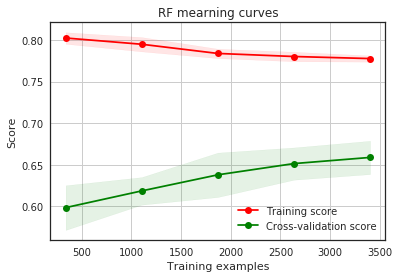

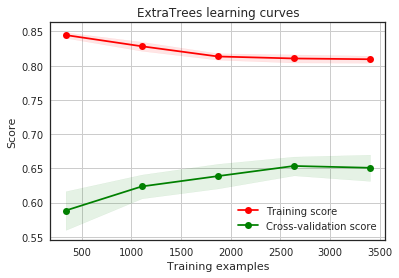

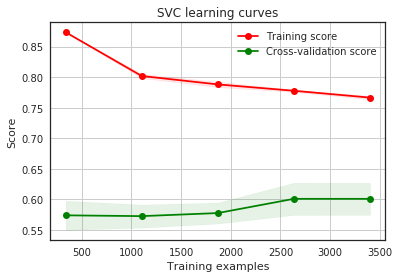

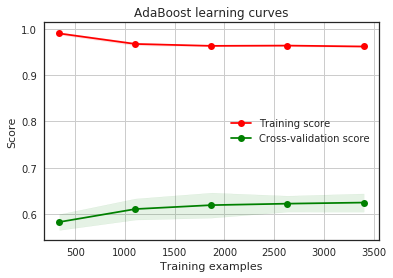

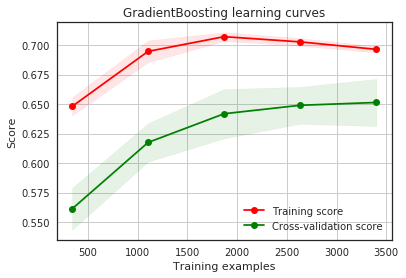

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

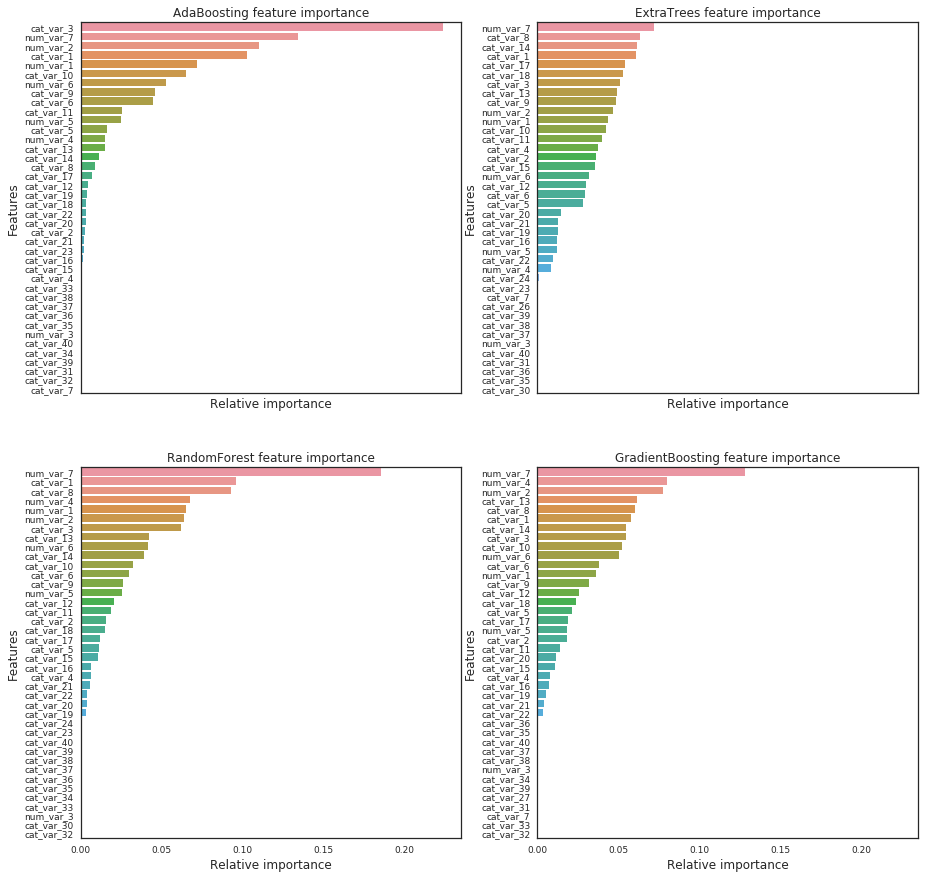

In [23]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

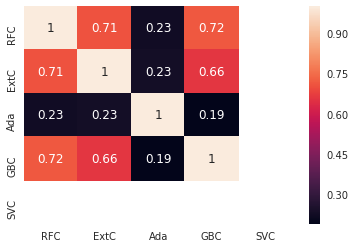

In [24]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [25]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [29]:
test_target = votingC.predict_proba(test)

In [31]:
test_target = pd.DataFrame(test_target)

In [33]:
StackingSubmission = pd.DataFrame({ 'transaction_id': IDtest,
                            'target': test_target[1] })

In [34]:
StackingSubmission.to_csv("StackingSubmission_05.csv", index=False)